In [205]:
EXPERIMENT_NUMBER = 28

In [206]:
import os
import cv2
import numpy as np
from pathlib import Path
from PIL import Image
import statistics
import pandas as pd

GT_PROB = 0.7

labeled_dir = str("/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled")

result_test_path_general = "/home/eric/Documents/cervicalResearchIIP/result_test/unet&transunet_result/7/20241218-TransUnetIntegrationUnetMultiplev5/"



from plotImg import plot_images
def plot_label_image(plot_output_img, path = 'None'):
     plot_img = []
     for output_img in plot_output_img:
          labels = np.unique(output_img)
          image = np.ones((255, 255, 3), dtype=np.uint8) * 0
          for x in range(255):
               for y in range(255):
                    # Get the pixel value (brightness)
                    pixel = output_img[x][y]
                    #  print(type(output_img))
                    if pixel == labels[0]:
                         image[x, y] = [0,0,0]
                    elif pixel == labels[1]:
                         image[x, y] = [2, 247, 68]
                    elif pixel == labels[2]:
                         image[x, y] = [255, 0, 38]
                    elif pixel == labels[3]:
                         image[x, y] = [234, 5, 250]
                    elif pixel == labels[4]:
                         image[x, y] = [21, 0, 255]
                    elif pixel == labels[5]:
                         image[x, y] = [0, 220, 245]
                    elif pixel == labels[6]:
                         image[x, y] = [205, 240, 7]
                    elif pixel == labels[7]:
                         image[x, y] = [255, 98, 0]
                    elif pixel == labels[8]:
                         image[x, y] = [0, 174, 255]
                    elif pixel == labels[9]:
                         image[x, y] = [255, 0, 174]
                    elif pixel == labels[10]:
                         image[x, y] = [198, 119, 74]
                    else:
                         print("There are more labels!")
          plot_img.append(image)
     plot_images(path, plot_img)



/home/eric/Documents/cervicalResearchIIP/result_test/unet&transunet_result/7/20241218-TransUnetIntegrationUnetMultiplev5/fold1
N2-1.png
N1-6.png
N3-9.png
N1-2.png
N3-3.png
N4-1.png
N2-2.png
N5-1.png
N3-2.png
N1-4.png
N4-6.png
N5-6.png
Loaded 12 images.
Shape of the first image: (256, 256)
[ 0  1  2  3  4  5  6  7  8  9 10]


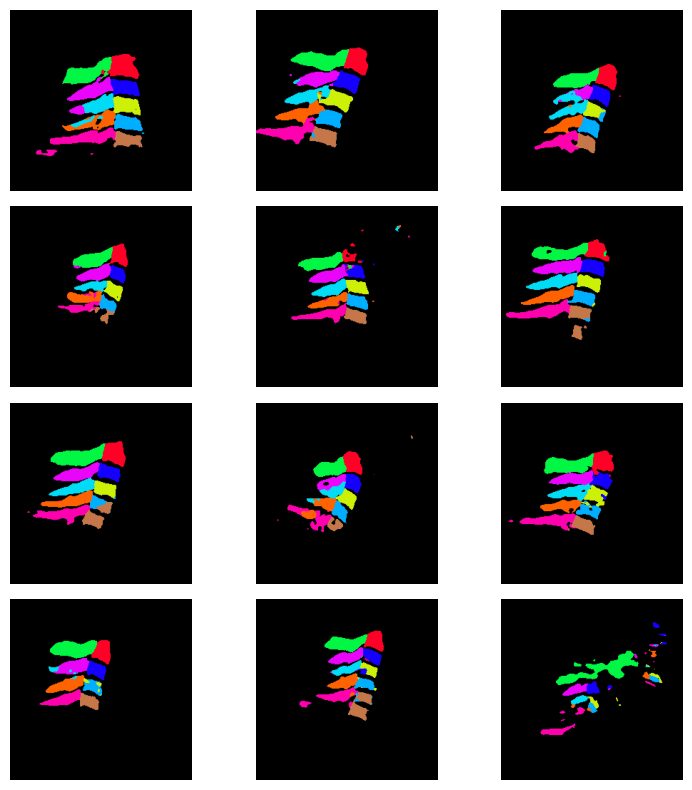

/home/eric/Documents/cervicalResearchIIP/result_test/unet&transunet_result/7/20241218-TransUnetIntegrationUnetMultiplev5/fold2
N4-4.png
N5-3.png
N1-8.png
N3-10.png
N1-3.png
N3-7.png
N2-5.png
N1-9.png
N3-6.png
N4-7.png
N2-10.png
Loaded 11 images.
Shape of the first image: (256, 256)
[ 0  1  2  3  4  5  6  7  8  9 10]


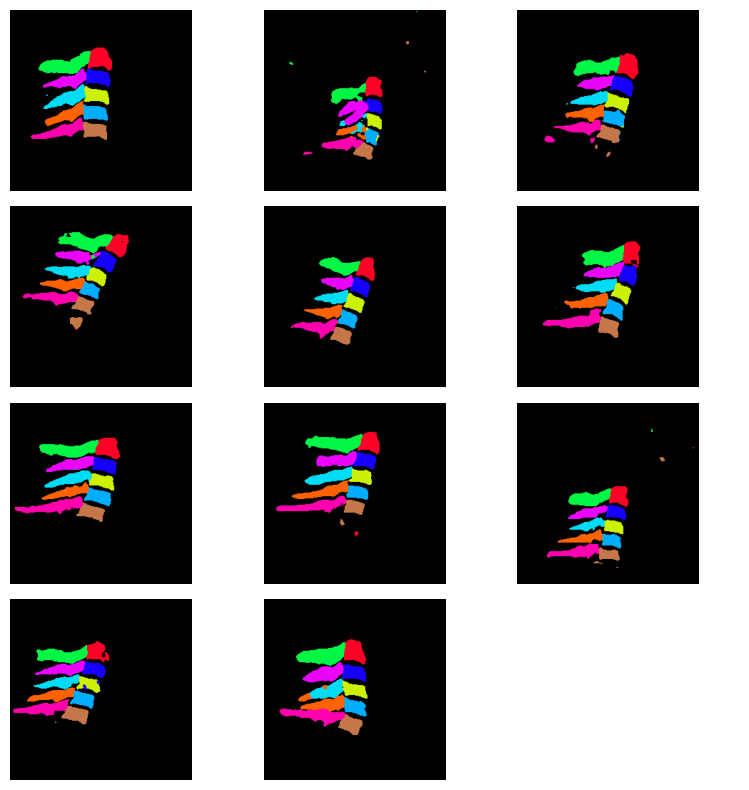

/home/eric/Documents/cervicalResearchIIP/result_test/unet&transunet_result/7/20241218-TransUnetIntegrationUnetMultiplev5/fold3
N1-10.png
N1-5.png
N2-9.png
N4-9.png
N2-4.png
N4-3.png
N3-8.png
N5-5.png
N4-8.png
N2-6.png
N3-4.png
Loaded 11 images.
Shape of the first image: (256, 256)
[ 0  1  2  3  4  5  6  7  8  9 10]


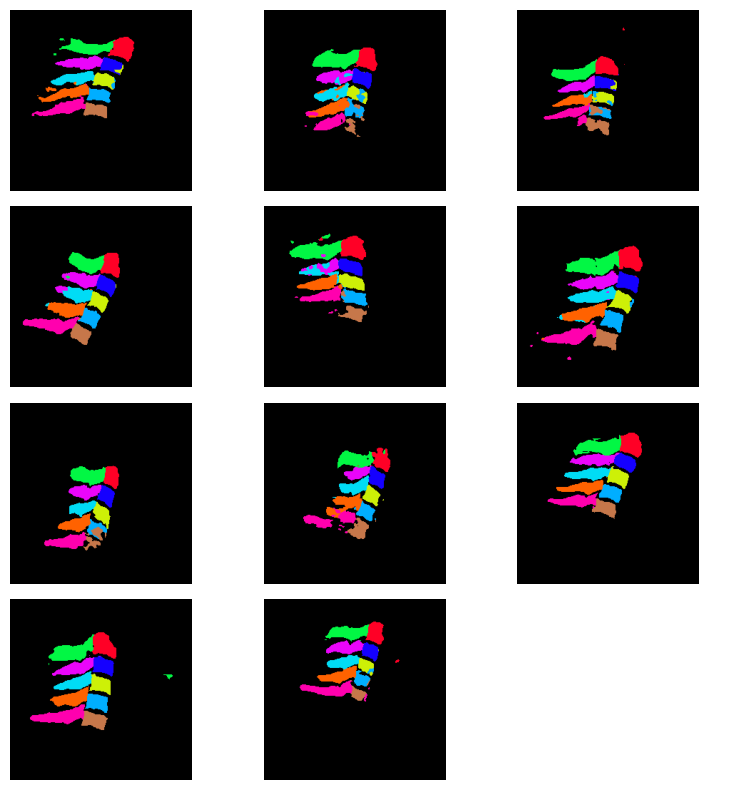

/home/eric/Documents/cervicalResearchIIP/result_test/unet&transunet_result/7/20241218-TransUnetIntegrationUnetMultiplev5/fold4
N4-2.png
N5-4.png
N2-8.png
N3-5.png
N2-7.png
N2-3.png
N1-1.png
N4-5.png
N1-7.png
N5-2.png
N3-1.png
Loaded 11 images.
Shape of the first image: (256, 256)
[ 0  1  2  3  4  5  6  7  8  9 10]


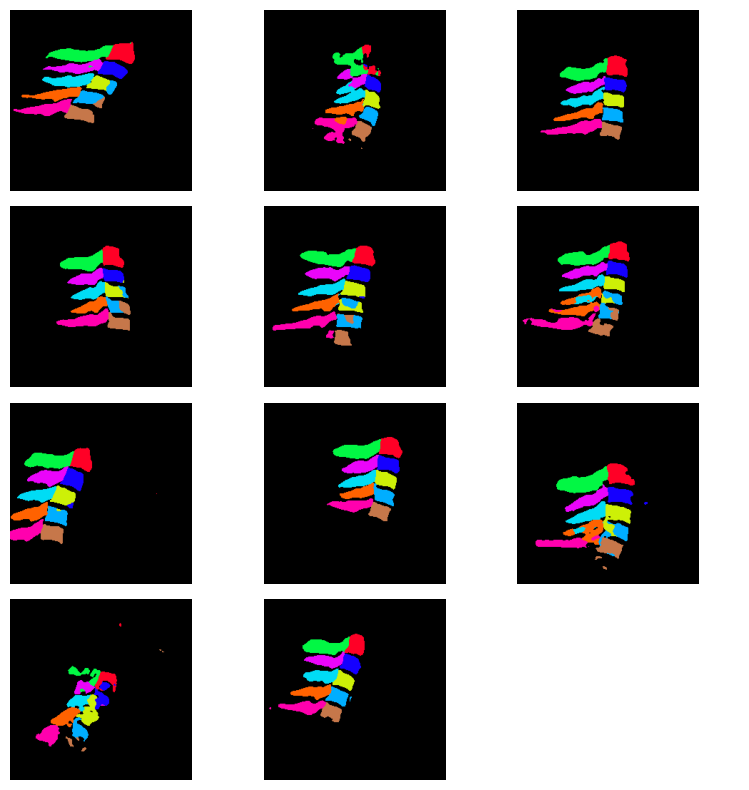

[['N2-1.png', 'N1-6.png', 'N3-9.png', 'N1-2.png', 'N3-3.png', 'N4-1.png', 'N2-2.png', 'N5-1.png', 'N3-2.png', 'N1-4.png', 'N4-6.png', 'N5-6.png'], ['N4-4.png', 'N5-3.png', 'N1-8.png', 'N3-10.png', 'N1-3.png', 'N3-7.png', 'N2-5.png', 'N1-9.png', 'N3-6.png', 'N4-7.png', 'N2-10.png'], ['N1-10.png', 'N1-5.png', 'N2-9.png', 'N4-9.png', 'N2-4.png', 'N4-3.png', 'N3-8.png', 'N5-5.png', 'N4-8.png', 'N2-6.png', 'N3-4.png'], ['N4-2.png', 'N5-4.png', 'N2-8.png', 'N3-5.png', 'N2-7.png', 'N2-3.png', 'N1-1.png', 'N4-5.png', 'N1-7.png', 'N5-2.png', 'N3-1.png']]


In [207]:
TEST = []
images_label_gray_general = []
crf_file_names_general = []
for i in range(4):
    result_test_path = result_test_path_general + "fold" + str(i+1)
    images_label_gray_fold = []
    crf_file_names_fold = []    
    print(result_test_path)
    TEST.append([file for file in os.listdir(result_test_path) if file.endswith('.png')])
    for filename in os.listdir(result_test_path):
        # Check if the file is a PNG image
        if filename.endswith('.png'):
            if filename.startswith("N"):
                # Construct the full file path
                print(filename)
                crf_file_names_fold.append(filename)
                file_path = os.path.join(result_test_path, filename)
                # Read the image using OpenCV
                img = cv2.imread(file_path)
                if img is not None:
                    #images.append(img) color
                    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    images_label_gray_fold.append(img_gray)  # Append the grayscale image
                else:
                    print(f"Failed to read image: {file_path}")

    # Now `images` contains all the loaded PNG images
    print(f"Loaded {len(images_label_gray_fold)} images.")

    if images_label_gray_fold:
        print(f"Shape of the first image: {images_label_gray_fold[0].shape}")  # This will show the dimensions of the image
    print(np.unique(images_label_gray_fold))
    plot_label_image(images_label_gray_fold)
    images_label_gray_general.append(images_label_gray_fold)
    crf_file_names_general.append(crf_file_names_fold)

print(TEST)



In [208]:
print(len(TEST))
print(len(TEST[0]))
print(len(TEST[1]))
print(len(TEST[2]))
print(len(TEST[3]))
print("*******")
print(len(crf_file_names_general))
print(len(crf_file_names_general[0]))
print(len(crf_file_names_general[1]))
print(len(crf_file_names_general[2]))
print(len(crf_file_names_general[3]))
print("*******")
print(len(images_label_gray_general))
print(len(images_label_gray_general[0]))
print(len(images_label_gray_general[1]))
print(len(images_label_gray_general[2]))
print(len(images_label_gray_general[3]))

4
12
11
11
11
*******
4
12
11
11
11
*******
4
12
11
11
11


In [209]:
import pydensecrf.densecrf as dcrf
from pydensecrf.utils import unary_from_labels, create_pairwise_gaussian



preCRF = images_label_gray_general

postCRF = []


for images_label_gray in images_label_gray_general:
    # Segmentation output from U-Net (predicted image)
    images_label_gray = np.array(images_label_gray)
    #labels = images_label_gray[5]
    refined_labels = []
    for image_label_gray in images_label_gray:
        print(image_label_gray.shape)

        H, W = image_label_gray.shape
        image_label_gray = image_label_gray.flatten()

        print(np.unique(image_label_gray))

        invalid_indices = np.where((image_label_gray < 0) | (image_label_gray > 10))

        # Check if there are any invalid indices
        if invalid_indices[0].size > 0:
            print("Invalid label indices:", invalid_indices[0])  # Print the flat indices of invalid labels
            print("Invalid label values:", image_label_gray[invalid_indices])  # Print the invalid label values
        else:
            print("All labels are within the valid range (0 to 10).")


        # Create a dense CRF model
        num_classes = 11  # 0 to 10, so 11 classes
        d = dcrf.DenseCRF2D(W, H, num_classes)  # (width, height, num_classes)

        # Create unary potentials
        unary = unary_from_labels(image_label_gray, n_labels = num_classes, gt_prob = GT_PROB, zero_unsure = False)
        d.setUnaryEnergy(unary)

        # Add pairwise terms (spatial & appearance smoothness)
        d.addPairwiseGaussian(sxy=3, compat=10)

        # Inference
        Q = d.inference(5)  # Perform 5 CRF iterations

        # Convert Q into a label image
        refined_label = np.argmax(Q, axis=0)  # Most probable class for each pixel

        # Reshape back to the original image shape
        refined_label = refined_label.reshape((H, W))
        refined_labels.append(np.array(refined_label))


    #preCRF = images_label_gray
    postCRF.append(refined_labels)



# for fold in preCRF:
#     plot_label_image(fold)
# for fold in postCRF:
#     plot_label_image(fold)

    # the plotting is not in order by the filename fix it!

(256, 256)
[ 0  1  2  3  4  5  6  7  8  9 10]
All labels are within the valid range (0 to 10).
(256, 256)
[ 0  1  2  3  4  5  6  7  8  9 10]
All labels are within the valid range (0 to 10).
(256, 256)
[ 0  1  2  3  4  5  6  7  8  9 10]
All labels are within the valid range (0 to 10).
(256, 256)
[ 0  1  2  3  4  5  6  7  8  9 10]
All labels are within the valid range (0 to 10).
(256, 256)
[ 0  1  2  3  4  5  6  7  8  9 10]
All labels are within the valid range (0 to 10).
(256, 256)
[ 0  1  2  3  4  5  6  7  8  9 10]
All labels are within the valid range (0 to 10).
(256, 256)
[ 0  1  2  3  4  5  6  7  8  9 10]
All labels are within the valid range (0 to 10).
(256, 256)
[ 0  1  2  3  4  5  6  7  8  9 10]
All labels are within the valid range (0 to 10).
(256, 256)
[ 0  1  2  3  4  5  6  7  8  9 10]
All labels are within the valid range (0 to 10).
(256, 256)
[ 0  1  2  3  4  5  6  7  8  9 10]
All labels are within the valid range (0 to 10).
(256, 256)
[ 0  1  2  3  4  5  6  7  8  9 10]
All 

In [210]:
for i in range(4):

    # Saving the crf enhanced images into crf dir

    # Create the crftestdir path
    crftestdir = result_test_path_general + "fold" +str(i+1) + "/crf"
    # Convert to Path object for easier manipulation
    crftestdir_path = Path(crftestdir)

    # Create the crf directory if it does not exist
    if not crftestdir_path.exists():
        crftestdir_path.mkdir(parents=True, exist_ok=True)
    refined_labels_case = postCRF[i]
    crf_file_names_case = crf_file_names_general[i]
    # Convert the array to uint8 type if necessary
    for index, refined_label in enumerate(refined_labels_case):
        refined_label_uint8 = refined_label.astype(np.uint8)
        # Create a PIL image from the NumPy array
        image = Image.fromarray(refined_label_uint8)
        # Save the crf refined images to the specified crf folder
        image.save(crftestdir_path / crf_file_names_case[index])  # Use / for path concatenation



In [211]:
def cal_DiceMulitple(dir, input_name):
    # change the label count as your preference
    Dice = [0] * 11
    Count1 = [0] * 11 #予測結果の各ラベルの要素数
    Count2 = [0] * 11 #ラベル画像の
    Count3 = [0] * 11 #正解した画素数
    
    for index in range(len(input_name)):
        print('index = ', index)

        img1 = cv2.imread(dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(labeled_dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        #_, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY)
        print("予測画像:", dir  + '/' + input_name[index] + ".png")
        print("テストラベル:", labeled_dir + '/' + input_name[index] + ".png")
        unique_label1 = np.unique(img1)
        unique_label2 = np.unique(img2)
        # print(unique_label1)
        # print(unique_label2)
        # change the image array size to your need
        for n in range(256):
            for l in range(256):
                value1 = img1[n,l]
                # for index, uq_value in enumerate(unique_label1):
                #     if(value1 == uq_value):
                #         value1 = index

                Count1[value1] += 1

                value2 = img2[n,l]
                Count2[value2] += 1                    

                if(value1 == value2):
                    Count3[value1] += 1 
    for i in range(11):
        if(Count1[i]+Count2[i] != 0):
            Dice[i] = (2*Count3[i])/(Count1[i] + Count2[i])
        if(Count1[i]+Count2[i] == 0):
            print("")
            #print("4 label case:" + str(input_name[index]))
    Dice.append(statistics.mean(Dice[1:]))
    print('Count1 = ', Count1)
    print('Count2 = ', Count2)
    print('Count3 = ', Count3)
    print('Dice = ', Dice)
    #print(unique_label)

    return Dice

In [212]:
def file_names_with_prefix(directory_path, prefix):

    # Initialize an empty list to store the file names without extensions
    file_names_without_extension = []

    # Loop through all files in the specified directory
    for filename in os.listdir(directory_path):
        #Checking if the file in loop exists in the directory_path not sure how is this necessary
        #??
        if os.path.isfile(os.path.join(directory_path, filename)):
            # Check if the file name starts with the specified prefix
            if filename.startswith(prefix):
                # Get the file name without extension
                name_without_extension, _ = os.path.splitext(filename)

                # Append the file name (without extension) to the list
                file_names_without_extension.append(name_without_extension)

    # Sort the list of file names without extensions in ascending order
    sorted_file_names = sorted(
        file_names_without_extension,
        key=lambda x: (x.split('-')[0], int(x.split('-')[1]))
    )  # Modify this part based on your file naming convention

    # Now you have a sorted list of file names with the specified prefix and without extensions
    return sorted_file_names

In [213]:
for i in range(4):
   preCRFdir = result_test_path_general + "fold" + str(i+1)
   postCRFdir = result_test_path_general + "fold" +str(i+1) + "/crf"

   imgs_namepre = []
   imgs_namepost = []

   # TEST = ["oN4"]

   ##for single image
   #imgs_namepre.append('oN3-4')
   #imgs_namepost.append('oN3-4')


      
   for pre_name in TEST[i]:
      imgs_namepre.extend(file_names_with_prefix(preCRFdir, pre_name))
      
      
      
   for post_name in TEST[i]:
      imgs_namepost.extend(file_names_with_prefix(postCRFdir, post_name))

   print(imgs_namepre)
   print(imgs_namepost)
   print(f"***Fold:{i}***")
   print("Pre CRF results:")
   Dice = cal_DiceMulitple(preCRFdir, imgs_namepre)
   df = pd.DataFrame(Dice)
   df = df.T

   print("Post CRF results:")
   Dice = cal_DiceMulitple(postCRFdir, imgs_namepost)
   df = pd.DataFrame(Dice)
   df = df.T
   df.to_csv(result_test_path_general + "/CRFDice.csv", mode='a', header=False)

   #plot_label_image(postCRF, postCRFdir)


['N2-1', 'N1-6', 'N3-9', 'N1-2', 'N3-3', 'N4-1', 'N2-2', 'N5-1', 'N3-2', 'N1-4', 'N4-6', 'N5-6']
['N2-1', 'N1-6', 'N3-9', 'N1-2', 'N3-3', 'N4-1', 'N2-2', 'N5-1', 'N3-2', 'N1-4', 'N4-6', 'N5-6']
***Fold:0***
Pre CRF results:
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/unet&transunet_result/7/20241218-TransUnetIntegrationUnetMultiplev5/fold1/N2-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-1.png
index =  1
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/unet&transunet_result/7/20241218-TransUnetIntegrationUnetMultiplev5/fold1/N1-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-6.png
index =  2
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/unet&transunet_result/7/20241218-TransUnetIntegrationUnetMultiplev5/fold1/N3-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-9.png
index =  3
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/unet&transunet_resu